# Content <a id = 'cont'></a>
- [Data Review](#1)
- [Preparing Data](#2)
- [Preparing Training Data](#3)
- [YoloV10](#4)
- [Detection](#5)
- [CONCLUSION](#6)

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 32.3 MB/s eta 0:00:00


In [5]:
# Python librarys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps

In [6]:
# This is a label from the annotation folder. This label is .xml format.
with open('/kaggle/input/face-mask-detection/annotations/maksssksksss116.xml') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss116.png</filename>
    <size>
        <width>400</width>
        <height>225</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>116</xmin>
            <ymin>88</ymin>
            <xmax>150</xmax>
            <ymax>122</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>160</xmin>
            <ymin>79</ymin>
            <xmax>193</xmax>
            <ymax>118</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</trunc

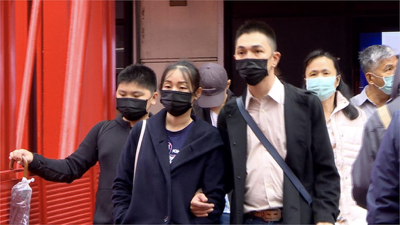

In [7]:
# This is image from the images folder.
Image.open("/kaggle/input/face-mask-detection/images/maksssksksss116.png")

In [8]:
with open('/kaggle/input/face-mask-detection/annotations/maksssksksss144.xml') as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss144.png</filename>
    <size>
        <width>400</width>
        <height>217</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>130</xmin>
            <ymin>19</ymin>
            <xmax>155</xmax>
            <ymax>47</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>212</xmin>
            <ymin>56</ymin>
            <xmax>232</xmax>
            <ymax>79</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncat

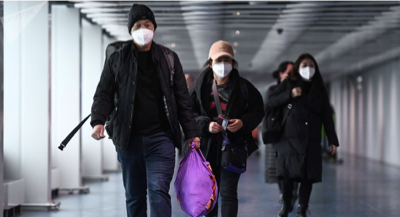

In [9]:
Image.open("/kaggle/input/face-mask-detection/images/maksssksksss144.png")

# Preparing Data <a id = '2'></a>
[Go Content](#cont)<br>
The data labels in our ready data set are in .xml format, we will convert this data to labels in .txt format.

In [10]:
# Preparing Data For Model(YoloV11)
# I will use these functions for .xml to .txt format.
def xml_to_yolo_bbox(bbox, w, h):
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h

    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h

    return [x_center, y_center, width, height]

def yolo_to_xml_bbox(bbox, w, h):
    w_half_len = (bbox[2] + w) / 2
    h_half_len = (bbox[3] + h) / 2

    xmin = int((bbox[0] + w) - w_half_len)
    ymin = int((bbox[1] + h) - h_half_len)
    xmax = int((bbox[0] + w) + w_half_len)
    ymax = int((bbox[1] + h) + h_half_len)

    return[xmin, ymin, xmax, ymax]

In [11]:
# Conversion phase
classes = []

input_dir = '/kaggle/input/face-mask-detection/annotations'
output_dir = '/kaggle/working/labels'
image_dir = '/kaggle/input/face-mask-detection/images'

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

files = glob.glob(os.path.join(input_dir, '*.xml'))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f'{filename}.png')):
        print(f'{filename} image does not exist')
        continue

    result = []

    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find('size').find('width').text)
    height = int(root.find('size').find('height').text)

    for obj in root.findall('object'):
        label = obj.find('name').text

        if label not in classes:
            classes.append(label)

        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find('bndbox')]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)

        bbox_string =  ' '.join([str(x) for x in yolo_bbox])
        result.append(f'{index} {bbox_string}')

    if result:
        with open(os.path.join(output_dir, f'{filename}.txt'), 'w', encoding = 'utf-8') as f:
            f.write('\n'.join(result))

with open(f'{output_dir}/classes.txt', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(classes))

In [12]:
# Lables
with open(f'{output_dir}/classes.txt') as f:
    contents = f.read()
    print(contents)

["with_mask", "mask_weared_incorrect", "without_mask"]


In [13]:
# .xml format
with open("/kaggle/input/face-mask-detection/annotations/maksssksksss174.xml") as f:
    contents = f.read()
    print(contents)


<annotation>
    <folder>images</folder>
    <filename>maksssksksss174.png</filename>
    <size>
        <width>400</width>
        <height>272</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>44</xmin>
            <ymin>63</ymin>
            <xmax>95</xmax>
            <ymax>117</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>102</xmin>
            <ymin>60</ymin>
            <xmax>142</xmax>
            <ymax>104</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncat

In [14]:
# .txt format
with open("/kaggle/working/labels/maksssksksss174.txt") as f:
    contents = f.read()
    print(contents)

0 0.17375 0.33088235294117646 0.1275 0.19852941176470587
0 0.305 0.3014705882352941 0.1 0.16176470588235295
0 0.5575 0.2647058823529412 0.135 0.20588235294117646
0 0.92875 0.2867647058823529 0.1025 0.17647058823529413


In [15]:
annotation_count = len(os.listdir("/kaggle/input/face-mask-detection/annotations"))
labels_count = len(os.listdir("/kaggle/working/labels"))
print(f"Annotation Counts: {annotation_count}")
print(f"Lables Counts: {labels_count}")

Annotation Counts: 853
Lables Counts: 854


## Preparing Training Data<a id = '3'></a>
[Go Content](#cont)<br>
I will prepare the training data for YOLOv11 in this chapter.

In [16]:
# Create a folder of train dataset
if not os.path.isfile("/kaggle/working/data"):
    os.mkdir('/kaggle/working/data')
    os.mkdir('/kaggle/working/data/train')
    os.mkdir('/kaggle/working/data/val')
    os.mkdir('/kaggle/working/data/test')
    os.mkdir('/kaggle/working/data/train/images')
    os.mkdir('/kaggle/working/data/train/labels')
    os.mkdir('/kaggle/working/data/test/images')
    os.mkdir('/kaggle/working/data/test/labels')
    os.mkdir('/kaggle/working/data/val/images')
    os.mkdir('/kaggle/working/data/val/labels')

In [17]:
# Material is the names of images in the images folder.
metarial = []
for i in os.listdir("/kaggle/input/face-mask-detection/images"):
    str = i[:-4]
    metarial.append(str)

In [18]:
metarial[0:10]

['maksssksksss810',
 'maksssksksss848',
 'maksssksksss145',
 'maksssksksss825',
 'maksssksksss30',
 'maksssksksss323',
 'maksssksksss805',
 'maksssksksss613',
 'maksssksksss315',
 'maksssksksss295']

In [19]:
print("Sum of image: ", len(metarial))
train_size = int(len(metarial) * 0.7)
test_size = int(len(metarial) * 0.15)
val_size = int(len(metarial) * 0.15)
print("Sum of the train size: ", train_size)
print("Sum of the test size: ", test_size)
print("Sum of the val size: ", val_size)

Sum of image:  853
Sum of the train size:  597
Sum of the test size:  127
Sum of the val size:  127


In [20]:
# The function is create train_data for YoloV11.
def preparinbdata(main_txt_file, main_img_file, train_size, test_size, val_size):
    for i in range(0, train_size):
        source_txt = main_txt_file + "/" + metarial[i] + ".txt"
        source_img = main_img_file + "/" + metarial[i] + ".png"
        
        mstring = metarial[i]
        train_destination_txt = "/kaggle/working/data/train/labels" + "/" + metarial[i] + ".txt"
        train_destination_png = "/kaggle/working/data/train/images" + "/" + metarial[i] + ".png"
        
        shutil.copy(source_txt, train_destination_txt)
        shutil.copy(source_img, train_destination_png)
        
    for l in range(train_size , train_size + test_size):

        source_txt = main_txt_file + "/" + metarial[l] + ".txt"
        source_img = main_img_file + "/" + metarial[l] + ".png"

        mstring = metarial[l]
        test_destination_txt = "/kaggle/working/data/test/labels" + "/" + metarial[l] + ".txt"
        test_destination_png = "/kaggle/working/data/test/images" + "/" + metarial[l] + ".png"

        shutil.copy(source_txt, test_destination_txt)
        shutil.copy(source_img, test_destination_png)

        #metarial.remove(file_name[:-4])


    for n in range(train_size + test_size , train_size + test_size + val_size):

        source_txt = main_txt_file + "/" + metarial[n] + ".txt"
        source_img = main_img_file + "/" + metarial[n] + ".png"

        mstring = metarial[n]
        val_destination_txt = "/kaggle/working/data/val/labels" + "/" + metarial[n] + ".txt"
        val_destination_png = "/kaggle/working/data/val/images" + "/" + metarial[n] + ".png"

        shutil.copy(source_txt, val_destination_txt)
        shutil.copy(source_img, val_destination_png)
        

In [21]:
#preparinbdata("/kaggle/working/labels", "/kaggle/input/face-mask-detection/images", 597, 127, 127)
preparinbdata(main_txt_file = "/kaggle/working/labels", 
              main_img_file = "/kaggle/input/face-mask-detection/images",
              train_size = train_size,
              test_size = test_size, 
              val_size = val_size)

In [22]:
# Create the data.yaml. I am going to use it on the train with yolov9.
yaml_text = """train: /kaggle/working/data/train/images/
val: /kaggle/working/data/val/images/

nc: 3
names: ["with_mask", "mask_weared_incorrect", "without_mask"]"""

with open("/kaggle/working/data/data.yaml", 'w') as file:
    file.write(yaml_text)

In [23]:
with open("/kaggle/working/data/data.yaml") as f:
    contents = f.read()
    print(contents)

train: /kaggle/working/data/train/images/
val: /kaggle/working/data/val/images/

nc: 3
names: ["with_mask", "mask_weared_incorrect", "without_mask"]


In [24]:
# We should close wandb because If we don't close wandb we can't start training.
import wandb
wandb.init(mode='disabled')

In [25]:
# Training 
from ultralytics import YOLO

model = YOLO('yolo12n.pt')

results = model.train(data="/kaggle/working/data/data.yaml", epochs=100, imgsz=640, save = True, device = [0])

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.34M/5.34M [00:00<00:00, 144MB/s]


Ultralytics 8.3.93 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.pt, data=/kaggle/working/data/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

100%|██████████| 755k/755k [00:00<00:00, 43.0MB/s]
2025-03-19 14:44:18,593	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-03-19 14:44:19,146	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  2    180864  ultralytics.nn.modules.block.A2C2f           [128, 128, 2, True, 4]        
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 162MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/data/train/labels... 597 images, 0 backgrounds, 0 corrupt: 100%|██████████| 597/597 [00:01<00:00, 426.97it/s]

train: New cache created: /kaggle/working/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/data/val/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 347.20it/s]

val: New cache created: /kaggle/working/data/val/labels.cache



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.48G      2.163      4.094      1.791        113        640:  39%|███▉      | 15/38 [00:05<00:07,  3.22it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      1/100      3.95G      1.759      3.033      1.371         46        640: 100%|██████████| 38/38 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        127        651     0.0079      0.442       0.11     0.0621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.97G      1.427      1.623      1.086        119        640:  37%|███▋      | 14/38 [00:03<00:06,  3.97it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      2/100      4.98G      1.393      1.539      1.101         33        640: 100%|██████████| 38/38 [00:10<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        127        651      0.756     0.0415      0.164     0.0978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.98G      1.319      1.392      1.106         85        640:  53%|█████▎    | 20/38 [00:04<00:04,  4.12it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      3/100      4.98G      1.302      1.327      1.107         38        640: 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        127        651      0.611      0.276      0.288      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.98G       1.35      1.163      1.052        122        640:  13%|█▎        | 5/38 [00:01<00:07,  4.18it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      4/100      4.99G      1.295      1.205      1.088         17        640: 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        127        651      0.689      0.313      0.333      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.99G      1.266      1.144      1.065        160        640:  34%|███▍      | 13/38 [00:03<00:06,  3.85it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      5/100      4.99G      1.263      1.136      1.077         33        640: 100%|██████████| 38/38 [00:09<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        127        651      0.841      0.386      0.452      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.99G      1.278      1.121      1.083        156        640:  45%|████▍     | 17/38 [00:04<00:05,  4.05it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      6/100      4.99G      1.271      1.097      1.075         53        640: 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]

                   all        127        651      0.793      0.457      0.527      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.99G      1.217      1.009      1.047        116        640:  58%|█████▊    | 22/38 [00:05<00:04,  3.94it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      7/100      4.99G       1.21       1.01      1.049         40        640: 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        127        651       0.85      0.478      0.563      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.99G      1.202     0.9874      1.055        154        640:  66%|██████▌   | 25/38 [00:06<00:03,  3.73it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      8/100      4.99G      1.218      1.002      1.064         29        640: 100%|██████████| 38/38 [00:09<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        127        651      0.869      0.463      0.573      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.99G      1.229     0.9573      1.046        103        640:  32%|███▏      | 12/38 [00:03<00:06,  3.97it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
      9/100      4.99G      1.208     0.9631      1.052         41        640: 100%|██████████| 38/38 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        127        651      0.832      0.533      0.585       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.99G      1.177     0.9384      1.052         55        640:  47%|████▋     | 18/38 [00:04<00:05,  3.84it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     10/100      4.99G      1.179      0.921      1.045         46        640: 100%|██████████| 38/38 [00:09<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        127        651      0.779       0.51       0.57       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.99G      1.165     0.8736      1.034        110        640:  66%|██████▌   | 25/38 [00:06<00:03,  3.34it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     11/100      4.99G      1.181     0.8932      1.041         29        640: 100%|██████████| 38/38 [00:10<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        127        651       0.77      0.589      0.677      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.99G       1.16      0.874      1.044        130        640:  63%|██████▎   | 24/38 [00:06<00:03,  3.62it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     12/100      4.99G      1.162     0.8804      1.041         29        640: 100%|██████████| 38/38 [00:10<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        127        651      0.735      0.578      0.637      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/38 [00:00<?, ?it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     13/100      4.99G      1.165     0.8388       1.04         30        640: 100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        127        651      0.825      0.554      0.649      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/38 [00:00<?, ?it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     14/100      4.99G      1.179     0.8198      1.044         27        640: 100%|██████████| 38/38 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        127        651      0.696      0.684      0.701      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.99G       1.17      0.817      1.039        191        640:  76%|███████▋  | 29/38 [00:07<00:02,  3.66it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     15/100      4.99G      1.166     0.8072      1.038         19        640: 100%|██████████| 38/38 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all        127        651      0.697      0.617      0.668      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.99G       1.21     0.8408       1.03         83        640:  55%|█████▌    | 21/38 [00:05<00:04,  3.87it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     16/100      4.99G      1.183     0.8283       1.03         23        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        127        651      0.752      0.663      0.703      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.99G      1.169     0.7958      1.039        134        640:  58%|█████▊    | 22/38 [00:06<00:04,  3.81it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     17/100      4.99G       1.13     0.7754      1.027         44        640: 100%|██████████| 38/38 [00:10<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]

                   all        127        651      0.784      0.701      0.733      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.99G      1.107     0.7365      1.027        105        640:  66%|██████▌   | 25/38 [00:06<00:03,  3.85it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     18/100      4.99G      1.108     0.7429      1.018         94        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        127        651      0.763      0.672      0.716      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.99G       1.11     0.7525      1.015        110        640:  32%|███▏      | 12/38 [00:03<00:06,  3.93it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     19/100      4.99G      1.119     0.7458      1.015         39        640: 100%|██████████| 38/38 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        127        651      0.777      0.682       0.75       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.99G      1.131     0.7658      1.022        164        640:  42%|████▏     | 16/38 [00:04<00:05,  3.73it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     20/100      4.99G      1.123     0.7577      1.018         28        640: 100%|██████████| 38/38 [00:09<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        127        651      0.734      0.716      0.744      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.99G      1.096     0.7306       1.01         52        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        127        651      0.759      0.665      0.733      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.99G      1.101     0.7404      1.025        144        640:  71%|███████   | 27/38 [00:07<00:02,  3.67it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     22/100      4.99G      1.121     0.7534      1.025        118        640:  89%|████████▉ | 34/38 [00:08<00:00,  4.01it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     22/100      4.99G      1.117     0.7596      1.023          9        640: 100%|██████████| 38/38 [00:09<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        127        651      0.737      0.685      0.714      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.99G      1.107      0.729      1.026         29        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        127        651      0.847      0.691      0.773      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.99G      1.131     0.7274     0.9956        105        640:   8%|▊         | 3/38 [00:00<00:09,  3.68it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     24/100      4.99G      1.106     0.7091      1.014         25        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        127        651      0.814      0.747      0.796      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.99G      1.123     0.7223      1.022        190        640:  92%|█████████▏| 35/38 [00:09<00:00,  3.44it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     25/100      4.99G      1.123     0.7286      1.023         22        640: 100%|██████████| 38/38 [00:10<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        127        651      0.769      0.735      0.765      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.99G      1.085     0.6883      1.015         68        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        127        651      0.733      0.652      0.691      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.99G      1.142     0.6988      1.017         98        640:  39%|███▉      | 15/38 [00:03<00:05,  3.84it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     27/100      4.99G      1.097     0.6911      1.016         31        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        127        651      0.756      0.697      0.756      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.99G      1.049     0.6794      1.021         61        640:  11%|█         | 4/38 [00:01<00:08,  3.83it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     28/100      4.99G       1.08     0.6855      1.002         64        640: 100%|██████████| 38/38 [00:10<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        127        651      0.834      0.719      0.789      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.99G      1.071     0.6493          1        112        640:  39%|███▉      | 15/38 [00:03<00:05,  3.93it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     29/100      4.99G      1.085     0.6593      1.006        110        640:  87%|████████▋ | 33/38 [00:08<00:01,  3.76it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     29/100      4.99G       1.07     0.6565      1.006         38        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        127        651      0.783      0.721      0.755        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.99G      1.067     0.6636      1.005         55        640: 100%|██████████| 38/38 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        127        651      0.795      0.716      0.769      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.99G      1.079     0.6482     0.9947        161        640:  58%|█████▊    | 22/38 [00:05<00:04,  3.52it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     31/100      4.99G      1.082     0.6537      1.001         56        640: 100%|██████████| 38/38 [00:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        127        651      0.822      0.693       0.76      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.99G      1.085     0.6664      1.003         16        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        127        651      0.814      0.694      0.768      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.99G      1.048      0.611     0.9828        101        640:  11%|█         | 4/38 [00:01<00:08,  3.94it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     33/100      4.99G      1.057      0.629      1.007         36        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        127        651      0.848      0.729      0.788      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.99G      1.103     0.6422      1.014        160        640:   3%|▎         | 1/38 [00:00<00:08,  4.13it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     34/100      4.99G      1.054     0.6351     0.9952         28        640: 100%|██████████| 38/38 [00:10<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        127        651      0.848      0.708      0.794      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.99G      1.064     0.6373     0.9911        122        640:  50%|█████     | 19/38 [00:04<00:04,  3.85it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     35/100      4.99G      1.041       0.63     0.9811         26        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        127        651      0.865      0.729      0.795      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.99G        1.1     0.6484     0.9919        135        640:   5%|▌         | 2/38 [00:00<00:08,  4.18it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     36/100      4.99G      1.033     0.6165      1.001         24        640: 100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        127        651      0.897      0.719      0.793      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.99G      1.046     0.6363     0.9855         84        640:  76%|███████▋  | 29/38 [00:08<00:02,  3.41it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     37/100      4.99G      1.055     0.6346     0.9843         79        640: 100%|██████████| 38/38 [00:10<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        127        651      0.907      0.704      0.812      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.99G      1.026     0.5981     0.9886        132        640:  13%|█▎        | 5/38 [00:01<00:08,  3.93it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     38/100      4.99G      1.001     0.6016     0.9856         43        640: 100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]

                   all        127        651      0.909      0.698      0.823      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.99G      1.051     0.6232      0.995        105        640:  55%|█████▌    | 21/38 [00:05<00:04,  3.72it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     39/100      4.99G      1.053     0.6273      0.998        103        640:  82%|████████▏ | 31/38 [00:08<00:01,  3.89it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     39/100      4.99G      1.048     0.6269     0.9945        102        640: 100%|██████████| 38/38 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        127        651      0.865       0.72      0.796      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.99G      1.036      0.633     0.9872         15        640: 100%|██████████| 38/38 [00:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        127        651      0.822      0.715       0.79      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.99G      1.054     0.6088     0.9816        167        640:  21%|██        | 8/38 [00:02<00:07,  3.88it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     41/100      4.99G      1.022     0.6031     0.9783         60        640: 100%|██████████| 38/38 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        127        651      0.884      0.685      0.814      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.99G      1.009     0.5944     0.9816         94        640:  68%|██████▊   | 26/38 [00:06<00:03,  3.93it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     42/100      4.99G      1.013     0.5893     0.9807         21        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]

                   all        127        651        0.9      0.747      0.822      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.99G      1.051     0.6173     0.9952        113        640:  39%|███▉      | 15/38 [00:03<00:05,  3.96it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     43/100      4.99G      1.028     0.5977     0.9838         30        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        127        651      0.917      0.678      0.797      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.99G      1.013     0.5997     0.9791         53        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        127        651      0.827      0.693      0.789      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.99G      1.015     0.5752     0.9738        155        640:  18%|█▊        | 7/38 [00:01<00:07,  3.92it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     45/100      4.99G      1.011     0.5822     0.9739         23        640: 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        127        651      0.781      0.796      0.804      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.99G     0.9863     0.5704     0.9662        120        640:  63%|██████▎   | 24/38 [00:06<00:03,  3.81it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     46/100      4.99G     0.9915     0.5655     0.9644         42        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        127        651      0.853       0.71      0.787      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.99G      1.015     0.5864     0.9678         29        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        127        651       0.82      0.744       0.81      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.99G     0.9927     0.5799     0.9698        156        640:  66%|██████▌   | 25/38 [00:06<00:03,  3.73it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     48/100      4.99G     0.9876     0.5712     0.9688         41        640: 100%|██████████| 38/38 [00:10<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  4.00it/s]

                   all        127        651      0.899      0.761      0.813      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.99G     0.9956     0.5674     0.9807         64        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        127        651      0.903      0.737      0.814      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.99G      1.007     0.5788     0.9683        118        640:  68%|██████▊   | 26/38 [00:06<00:03,  3.84it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     50/100      4.99G      1.008     0.5744     0.9663         26        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        127        651      0.793      0.769      0.787       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.99G     0.9714     0.5588     0.9684         50        640: 100%|██████████| 38/38 [00:10<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all        127        651      0.874      0.741      0.806      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.99G     0.9945     0.5676     0.9685        200        640:  37%|███▋      | 14/38 [00:03<00:06,  3.83it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     52/100      4.99G     0.9806      0.561     0.9651         69        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        127        651        0.8      0.747      0.795      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.99G     0.9684     0.5389     0.9754        142        640:  16%|█▌        | 6/38 [00:01<00:08,  3.84it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     53/100      4.99G     0.9724     0.5483     0.9652         24        640: 100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        127        651       0.83      0.746      0.785      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.99G     0.9924     0.5763      0.963        199        640:   5%|▌         | 2/38 [00:00<00:08,  4.11it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     54/100      4.99G     0.9603     0.5592     0.9672         71        640: 100%|██████████| 38/38 [00:10<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        127        651      0.908      0.748      0.817      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.99G      0.927     0.5401      0.988         88        640:  29%|██▉       | 11/38 [00:02<00:06,  3.96it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     55/100      4.99G     0.9616     0.5509     0.9678         30        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        127        651       0.94      0.713      0.809       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.99G      1.033     0.5759      1.017        105        640:   8%|▊         | 3/38 [00:00<00:09,  3.80it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     56/100      4.99G     0.9904     0.5473     0.9776         43        640: 100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]

                   all        127        651      0.882       0.78      0.831      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.99G      0.964     0.5321     0.9501         90        640:  68%|██████▊   | 26/38 [00:07<00:03,  3.76it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     57/100      4.99G     0.9622     0.5305     0.9529         49        640: 100%|██████████| 38/38 [00:10<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.99it/s]

                   all        127        651      0.907       0.75      0.841       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.99G     0.9976     0.5606     0.9609        142        640:   3%|▎         | 1/38 [00:00<00:08,  4.20it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     58/100      4.99G     0.9829      0.546      0.963         71        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        127        651      0.847      0.795      0.827      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.99G     0.9021     0.5165     0.9312        122        640:   3%|▎         | 1/38 [00:00<00:10,  3.66it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     59/100      4.99G     0.9421     0.5303     0.9524         35        640: 100%|██████████| 38/38 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all        127        651      0.931      0.725      0.819      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.99G     0.9365     0.5348     0.9544        158        640:  74%|███████▎  | 28/38 [00:07<00:02,  3.85it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     60/100      4.99G     0.9297     0.5307     0.9538         13        640: 100%|██████████| 38/38 [00:09<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        127        651      0.899      0.738      0.826      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.99G     0.9771     0.5501     0.9442        120        640:   5%|▌         | 2/38 [00:00<00:09,  3.86it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     61/100      4.99G     0.9581     0.5349     0.9552         60        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        127        651      0.835      0.789      0.825      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.99G     0.9686     0.5366     0.9519        112        640:  18%|█▊        | 7/38 [00:01<00:08,  3.79it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     62/100      4.99G     0.9301      0.527     0.9582        103        640:  95%|█████████▍| 36/38 [00:09<00:00,  3.86it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     62/100      4.99G     0.9283     0.5296     0.9562         63        640: 100%|██████████| 38/38 [00:10<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all        127        651      0.852      0.755      0.792      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.99G     0.9309     0.5066     0.9455         17        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        127        651      0.899      0.747      0.832      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.99G     0.9187      0.491     0.9632         89        640:  21%|██        | 8/38 [00:02<00:07,  3.87it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     64/100      4.99G     0.9447     0.5136     0.9524         23        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        127        651      0.835      0.779      0.829       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.99G     0.9684     0.5251     0.9386        100        640:  24%|██▎       | 9/38 [00:02<00:07,  3.72it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     65/100      4.99G     0.9611     0.5197     0.9415         39        640: 100%|██████████| 38/38 [00:10<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        127        651      0.808      0.787      0.822      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.99G     0.9307     0.5137     0.9527        191        640:  53%|█████▎    | 20/38 [00:05<00:04,  3.81it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     66/100      4.99G      0.921      0.508     0.9565         18        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        127        651      0.874      0.771      0.826      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.99G     0.9029     0.5031     0.9432        180        640:  53%|█████▎    | 20/38 [00:05<00:04,  3.90it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     67/100      4.99G     0.9223      0.507     0.9389         36        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        127        651       0.89      0.777      0.835      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.99G     0.9149     0.4965     0.9475         98        640:  97%|█████████▋| 37/38 [00:09<00:00,  3.85it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     68/100      4.99G     0.9108     0.4938     0.9475         41        640: 100%|██████████| 38/38 [00:10<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all        127        651      0.861      0.747      0.813      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.99G     0.8807     0.4887     0.9289         24        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        127        651      0.868      0.727       0.81       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/38 [00:00<?, ?it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     70/100      4.99G     0.8979     0.4913     0.9393         42        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        127        651      0.858      0.764       0.79      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.99G     0.8718     0.4741     0.9391         96        640:  53%|█████▎    | 20/38 [00:05<00:05,  3.43it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     71/100      4.99G     0.8964      0.492     0.9369         14        640: 100%|██████████| 38/38 [00:10<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        127        651       0.86       0.74      0.803      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.99G     0.9164     0.4955     0.9379         53        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        127        651      0.889      0.754      0.821      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.99G      0.906     0.4877     0.9538        131        640:  32%|███▏      | 12/38 [00:03<00:06,  3.93it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     73/100      4.99G     0.9058     0.4978     0.9491         14        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        127        651      0.844      0.777      0.802      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.99G     0.9304     0.5021     0.9329        167        640:  68%|██████▊   | 26/38 [00:06<00:03,  3.85it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     74/100      4.99G     0.9255     0.4955     0.9351         25        640: 100%|██████████| 38/38 [00:09<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]

                   all        127        651      0.822      0.775      0.812      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.99G     0.8926     0.4731      0.923        167        640:   8%|▊         | 3/38 [00:00<00:08,  3.99it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     75/100      4.99G      0.863     0.4806      0.942         17        640: 100%|██████████| 38/38 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        127        651        0.9      0.733        0.8      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.99G     0.8829     0.4806      0.932        101        640:  39%|███▉      | 15/38 [00:03<00:06,  3.68it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     76/100      4.99G     0.8715     0.4775     0.9312         13        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        127        651      0.869      0.743      0.805      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.99G     0.8563     0.4674     0.9386         77        640:  39%|███▉      | 15/38 [00:04<00:06,  3.67it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     77/100      4.99G     0.9011     0.4819     0.9385        125        640:  84%|████████▍ | 32/38 [00:08<00:01,  3.87it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     77/100      4.99G     0.9032     0.4787     0.9395         27        640: 100%|██████████| 38/38 [00:10<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        127        651      0.841      0.785       0.82      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.99G     0.8735     0.4726     0.9399         99        640:  92%|█████████▏| 35/38 [00:09<00:00,  3.79it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     78/100      4.99G     0.8877     0.4787     0.9399         82        640: 100%|██████████| 38/38 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        127        651      0.833      0.784      0.812       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.99G     0.8731     0.4723     0.9222        116        640:  79%|███████▉  | 30/38 [00:07<00:02,  3.74it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     79/100      4.99G     0.8781      0.472     0.9218         27        640: 100%|██████████| 38/38 [00:09<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]

                   all        127        651      0.889       0.78      0.823       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.99G     0.8926     0.4696     0.9273         33        640: 100%|██████████| 38/38 [00:09<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        127        651      0.892      0.782      0.824      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.99G     0.8497     0.4615     0.9252        154        640:  53%|█████▎    | 20/38 [00:05<00:04,  3.87it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     81/100      4.99G     0.8774     0.4681     0.9228         61        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        127        651      0.924      0.741      0.816       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.99G     0.8678     0.4541     0.9267        125        640:  16%|█▌        | 6/38 [00:01<00:08,  3.86it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     82/100      4.99G     0.8772     0.4688     0.9246         86        640: 100%|██████████| 38/38 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        127        651      0.911      0.742      0.818      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.99G     0.7988     0.4417     0.9016        189        640:   3%|▎         | 1/38 [00:00<00:10,  3.60it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     83/100      4.99G      0.859     0.4688     0.9213         34        640: 100%|██████████| 38/38 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        127        651      0.876      0.775      0.816      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.99G     0.8909     0.4697     0.9246        147        640:  68%|██████▊   | 26/38 [00:06<00:03,  3.93it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     84/100      4.99G     0.8828     0.4668     0.9239         52        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        127        651      0.869       0.76      0.805      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.99G     0.8689     0.4581     0.9089        133        640:  26%|██▋       | 10/38 [00:02<00:07,  3.78it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     85/100      4.99G     0.8698      0.466     0.9234         52        640: 100%|██████████| 38/38 [00:10<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        127        651      0.942      0.739      0.815      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.99G     0.8565     0.4528      0.927        116        640:  58%|█████▊    | 22/38 [00:05<00:04,  3.85it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     86/100      4.99G     0.8554     0.4563     0.9229         23        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all        127        651      0.889      0.764      0.813      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.99G      0.859     0.4521     0.9169         51        640: 100%|██████████| 38/38 [00:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        127        651      0.865      0.798      0.824      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.99G     0.8467     0.4495     0.9267        162        640:  34%|███▍      | 13/38 [00:03<00:06,  3.83it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     88/100      4.99G     0.8719     0.4536     0.9265         22        640: 100%|██████████| 38/38 [00:10<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

                   all        127        651      0.936      0.743      0.824      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.99G     0.8474     0.4445     0.9136        128        640:  61%|██████    | 23/38 [00:05<00:03,  3.88it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     89/100      4.99G     0.8331     0.4441     0.9169         28        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        127        651       0.94      0.721      0.812      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.99G      0.794     0.4261     0.9092        120        640:  50%|█████     | 19/38 [00:04<00:05,  3.73it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     90/100      4.99G     0.8413     0.4492     0.9191         53        640: 100%|██████████| 38/38 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        127        651      0.903      0.724      0.811      0.552


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.99G      0.839     0.4372      0.914         43        640:  45%|████▍     | 17/38 [00:06<00:06,  3.27it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     91/100      4.99G     0.8217     0.4266      0.906         15        640: 100%|██████████| 38/38 [00:11<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        127        651      0.914      0.715      0.807      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.99G      0.809     0.4065     0.9067         63        640:  71%|███████   | 27/38 [00:06<00:02,  3.74it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     92/100      4.99G     0.8111     0.4067     0.9048         45        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        127        651      0.924      0.712      0.807      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.99G     0.8098     0.4017     0.9056         18        640: 100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        127        651      0.901      0.767       0.82      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.99G     0.8081     0.4034     0.9134        129        640:  74%|███████▎  | 28/38 [00:07<00:02,  3.76it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     94/100      4.99G      0.808      0.401     0.9119         27        640: 100%|██████████| 38/38 [00:09<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        127        651      0.912      0.765      0.825      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.99G     0.7922     0.3939     0.8969         78        640:  97%|█████████▋| 37/38 [00:09<00:00,  3.78it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     95/100      4.99G     0.7963     0.3963     0.8982         19        640: 100%|██████████| 38/38 [00:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        127        651       0.92      0.766      0.822      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.99G     0.7792     0.3862     0.8998         49        640:  84%|████████▍ | 32/38 [00:08<00:01,  3.95it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     96/100      4.99G      0.778     0.3839     0.8999         15        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all        127        651      0.952      0.762      0.828       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.99G     0.7839     0.3886     0.8876         12        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        127        651      0.905      0.793      0.824      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.99G     0.9798     0.4192     0.8918        123        640:   3%|▎         | 1/38 [00:00<00:08,  4.15it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     98/100      4.99G     0.7833     0.3955     0.8931         26        640: 100%|██████████| 38/38 [00:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        127        651      0.884      0.787       0.82      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.99G     0.7766       0.38      0.889         78        640:  76%|███████▋  | 29/38 [00:07<00:02,  3.82it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
     99/100      4.99G     0.7682     0.3815     0.8883         15        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all        127        651      0.894      0.781      0.824      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.99G     0.7606      0.386     0.8905        161        640:  66%|██████▌   | 25/38 [00:06<00:03,  3.88it/s]libpng warning: iCCP: Not recognizing known sRGB profile that has been edited
    100/100      4.99G      0.758     0.3812     0.8972         11        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]

                   all        127        651       0.92       0.77      0.825      0.558



100 epochs completed in 0.320 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,313 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]


                   all        127        651      0.892      0.782      0.825      0.563
             with_mask        116        500      0.949      0.886      0.944      0.642
 mask_weared_incorrect         19         24      0.818      0.667      0.675      0.492
          without_mask         51        127       0.91      0.793      0.856      0.556
Speed: 0.1ms preprocess, 3.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


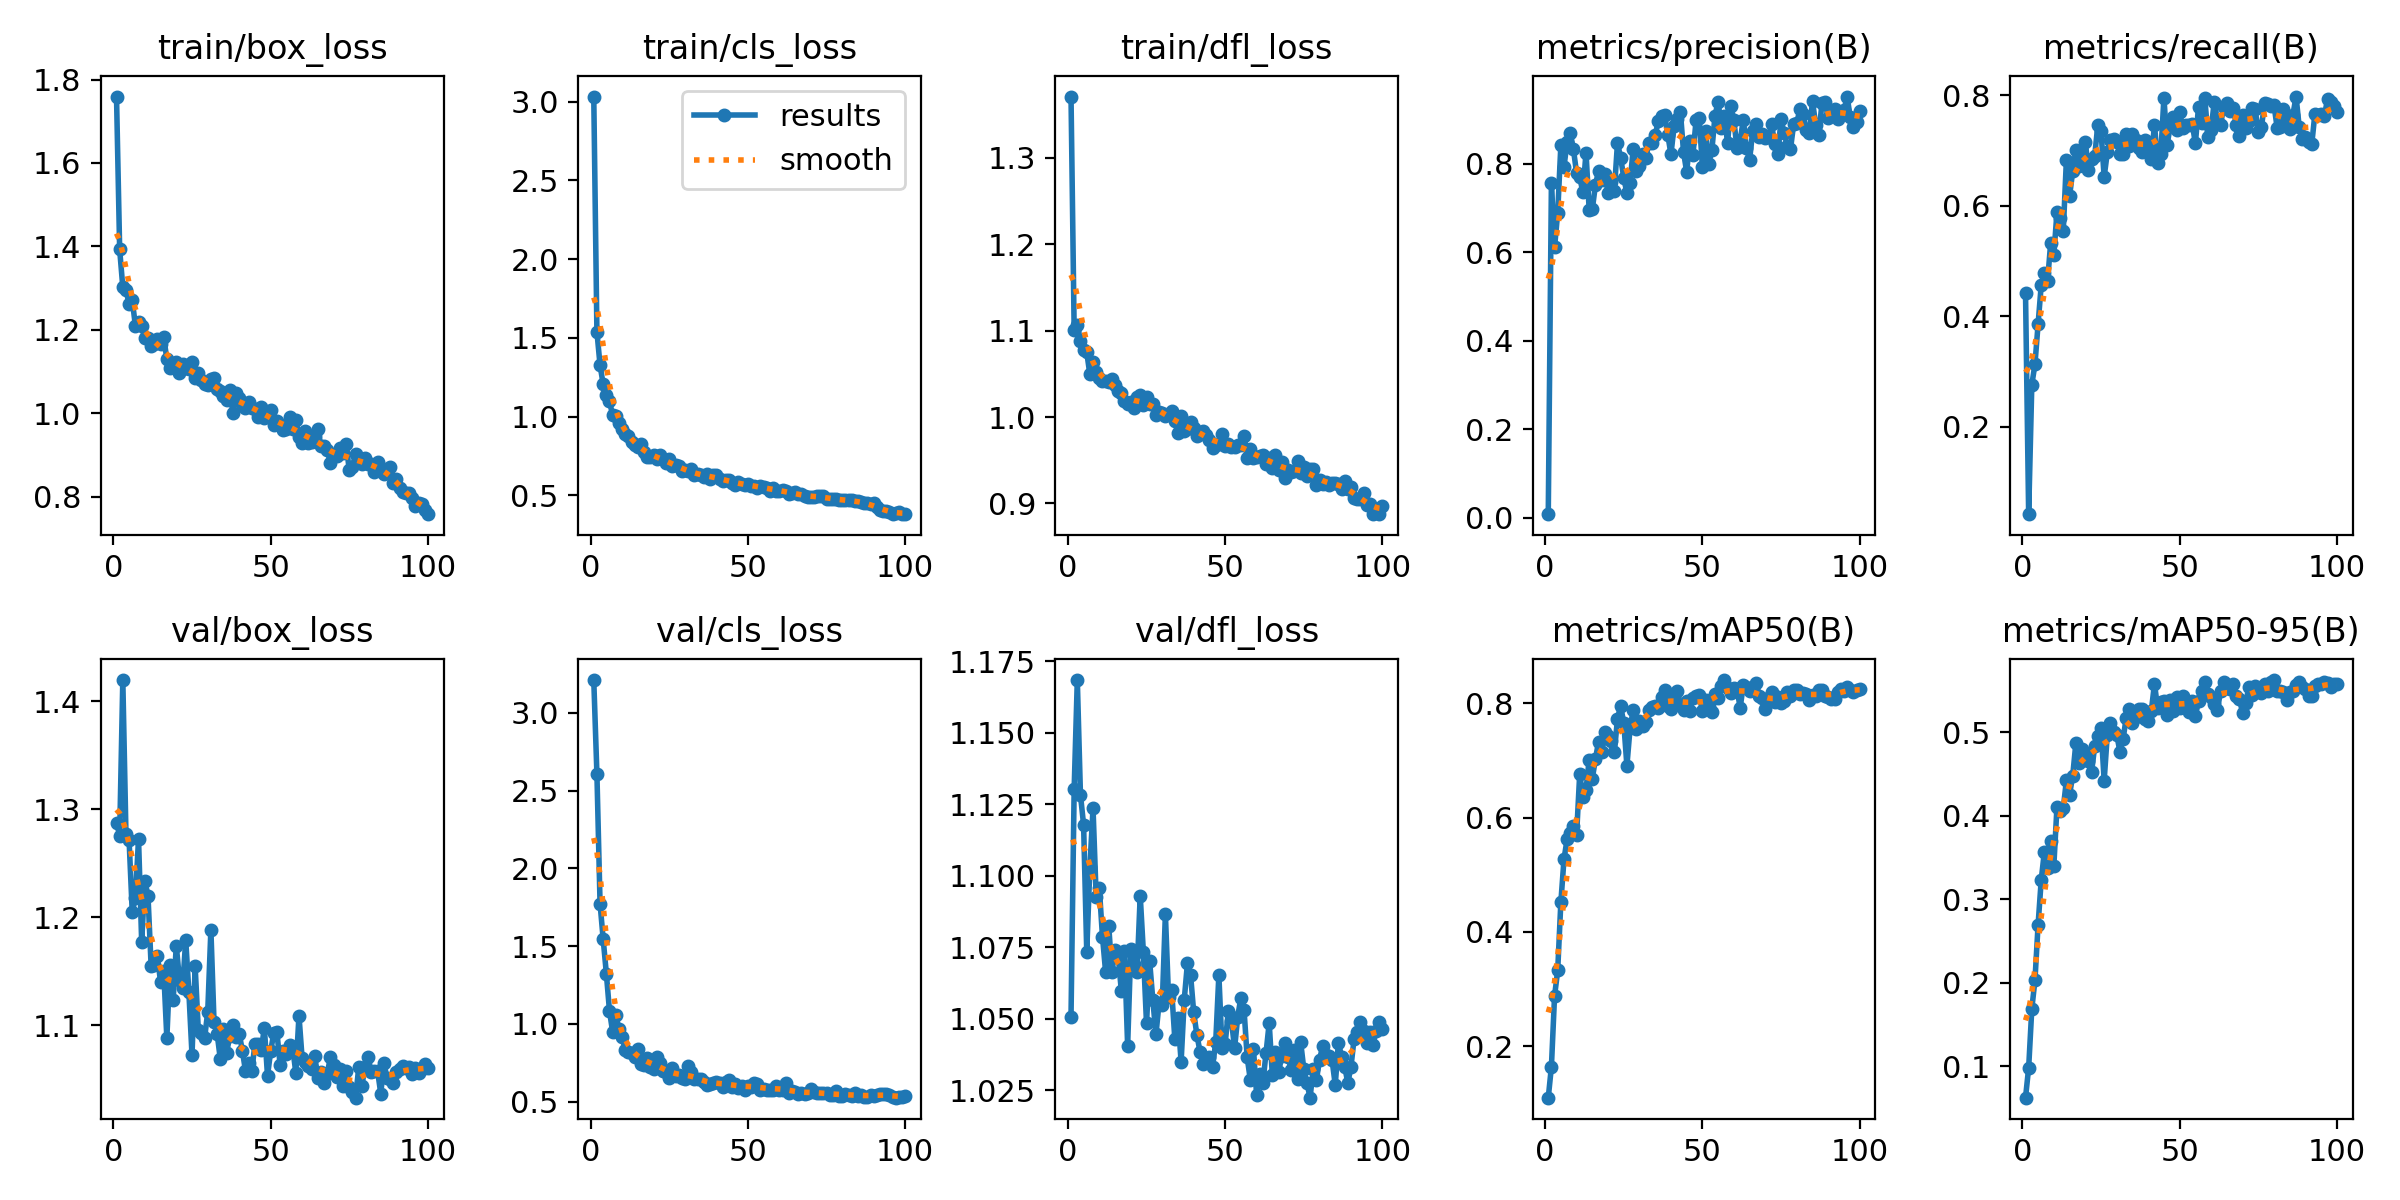

In [26]:
# Training result image
Image.open("/kaggle/working/runs/detect/train/results.png")

The values ​​in the result image are stable and in this 50-step training we performed, there were decreases in train_loss and val_loss values, which is a good situation. At the same time, the increase in metrics_precision, recall, mAP50, and mAP50-95 values ​​is also a good situation.

Detailed Analysis of the Graphs
- Train Loss:
    - Box Loss: Represents the error rate in predicting the bounding boxes of objects. As training progresses, this value generally decreases, indicating that your model is becoming better at predicting the locations of objects.
    - Cls Loss: Represents the error rate in classifying objects. This value also decreases as training progresses, indicating that your model is becoming better at correctly classifying objects.
    - Dfl Loss: This loss function represents the error rate in predicting the size and shape of objects. The decrease in dfl loss as training progresses indicates that your model is becoming better at predicting the size of objects.

- Validation Loss: Used to evaluate the generalizability of the results obtained on the training set on a previously unseen dataset (validation set). It is normal for the validation loss to be higher than the training loss, but the difference between the two is expected to decrease as training progresses. This is generally observed in the graphs.
  
- Metrics:
    - Precision: Represents the ratio of true positive predictions to total positive predictions. A high precision value indicates that the model has few false positive predictions.
    - Recall: Represents the ratio of true positive predictions to all actual positive examples. A high recall value indicates that the model is able to correctly find most of the true positive examples.
    - mAP (Mean Average Precision): It is the average of the average precision values calculated at different IoU (Intersection over Union) thresholds. The mAP value is a comprehensive metric used to evaluate the overall performance of the model. The increase in mAP50 and mAP50-95 values as training progresses indicates that your model's object detection performance is improving.

In [27]:
# We will perform the detection process using the weights that the model we trained achieved the best result in 50 steps of training.
model_predict = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

In [28]:
# Detection 1
model_predict.predict("/kaggle/working/data/test/images/maksssksksss451.png", save=True)


image 1/1 /kaggle/working/data/test/images/maksssksksss451.png: 448x640 10 with_masks, 5 without_masks, 57.0ms
Speed: 1.9ms preprocess, 57.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'with_mask', 1: 'mask_weared_incorrect', 2: 'without_mask'}
 obb: None
 orig_img: array([[[156, 156, 187],
         [ 34,  35,  54],
         [ 11,  15,  23],
         ...,
         [ 85,  67, 104],
         [ 89,  71, 109],
         [ 88,  70, 109]],
 
        [[182, 181, 212],
         [ 50,  50,  67],
         [ 12,  14,  19],
         ...,
         [ 81,  66,  96],
         [ 83,  68, 101],
         [ 83,  68, 103]],
 
        [[185, 185, 216],
         [ 94,  94, 110],
         [  6,   7,  10],
         ...,
         [ 73,  64,  77],
         [ 73,  63,  82],
         [ 76,  66,  89]],
 
        ...,
 
        [[ 40,  58,  98],
         [ 41,  58, 100],
         [ 43,  57, 100],
         ...,
         [ 27,  26,  28],
         [ 20,  15,  16],
         [ 13,   8,   9]],
 
        [[ 36,  57,  93],
         [ 39,  57,  96],
        

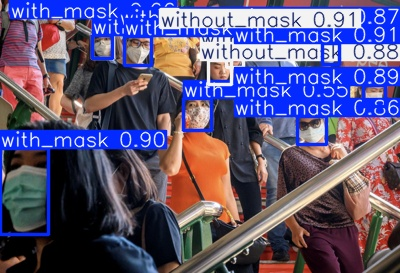

In [29]:
# Detection 1 Result
Image.open("/kaggle/working/runs/detect/predict/maksssksksss451.jpg")

In [30]:
# Download Image
!wget "https://onecms-res.cloudinary.com/image/upload/s--XV7DHKzY--/c_fill,g_auto,h_468,w_830/f_auto,q_auto/people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A"

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2025-03-19 15:04:54--  https://onecms-res.cloudinary.com/image/upload/s--XV7DHKzY--/c_fill,g_auto,h_468,w_830/f_auto,q_auto/people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A
Resolving onecms-res.cloudinary.com (onecms-res.cloudinary.com)... 151.101.65.137, 151.101.193.137, 151.101.129.137, ...
Connecting to onecms-res.cloudinary.com (onecms-res.cloudinary.com)|151.101.65.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44288 (43K) [image/jpeg]
Saving to: 'people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A'

people-wearing-mask 100%[===================>]  43.25K  --.-KB/s    in 0.003s  

2025-03-19 15:04:54 (13.1 MB/s) - 'people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A' saved [44288/44288]



In [31]:
# Rename image
os.rename("/kaggle/working/people-wearing-mask-at-orchard-road-singapore-feb-3--49-.jpg?itok=GdDk1T6A", "image.jpg")

In [32]:
# Detection 2
model_predict.predict("/kaggle/working/image.jpg", save=True) 


image 1/1 /kaggle/working/image.jpg: 384x640 2 with_masks, 4 without_masks, 71.7ms
Speed: 2.8ms preprocess, 71.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'with_mask', 1: 'mask_weared_incorrect', 2: 'without_mask'}
 obb: None
 orig_img: array([[[ 41,  52,  50],
         [ 41,  52,  50],
         [ 38,  51,  49],
         ...,
         [156, 145, 131],
         [147, 136, 122],
         [141, 130, 116]],
 
        [[ 41,  52,  50],
         [ 41,  52,  50],
         [ 38,  51,  49],
         ...,
         [155, 144, 130],
         [146, 135, 121],
         [139, 128, 114]],
 
        [[ 41,  52,  50],
         [ 41,  52,  50],
         [ 38,  51,  49],
         ...,
         [153, 142, 128],
         [144, 133, 119],
         [137, 126, 112]],
 
        ...,
 
        [[227, 197, 180],
         [227, 197, 180],
         [226, 196, 179],
         ...,
         [147, 145, 144],
         [143, 141, 140],
         [140, 138, 137]],
 
        [[227, 197, 180],
         [227, 197, 180],
        

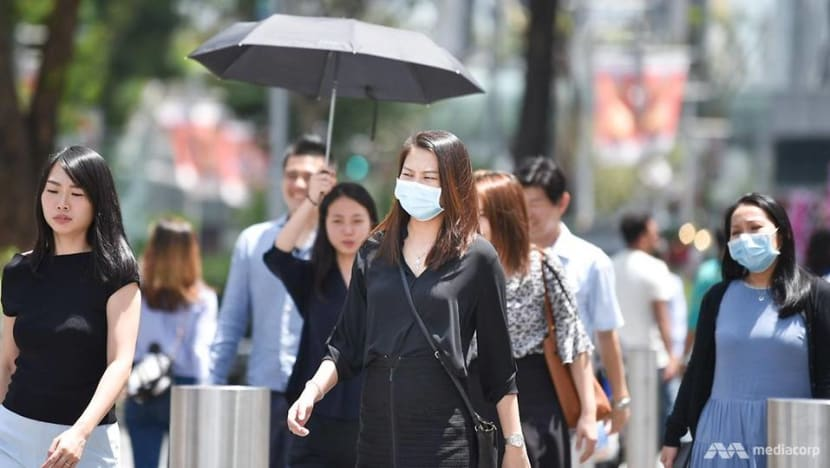

In [33]:
# Original image
Image.open("/kaggle/working/image.jpg")

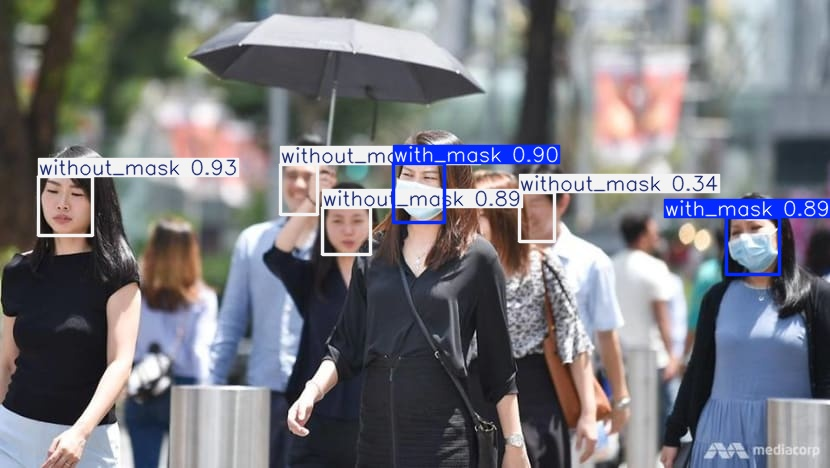

In [34]:
# Detection 2 Result
Image.open("/kaggle/working/runs/detect/predict/image.jpg")